## 迷宫随机生成

ref: https://github.com/tpof314/maze

- 生成一张网格，把网格里面的所有边都存进一个列表edgeList里面.
- 从(0, 0)开始，做DFS。每次DFS的时候，随机地选择四周一个没有走过的格子，凿墙过去，把道路打通。凿墙的时候，把edgeList列表中相对应的那堵墙删除掉。
- 将剩下的没有凿开过的墙画出来，就是一个完整的迷宫了。

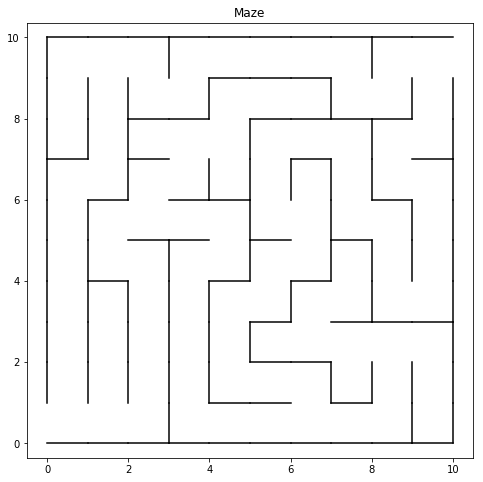

In [11]:
import sys
import matplotlib
import matplotlib.pyplot as plt
from random import randint
from IPython import display
import time
%matplotlib inline

WIDTH  = 10
HEIGHT = 10
# sys.setrecursionlimit(WIDTH * HEIGHT)

def initVisitedList():
    visited = []
    for y in range(HEIGHT):
        line = []
        for x in range(WIDTH):
            line.append(False)
        visited.append(line)
    return visited

def drawLine(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], color="black")

def removeLine(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], color="white")

def get_edges(x, y):
    result = []
    result.append((x, y, x, y+1))
    result.append((x+1, y, x+1, y+1))
    result.append((x, y, x+1, y))
    result.append((x, y+1, x+1, y+1))

    return result

def drawCell(x, y):
    edges = get_edges(x, y)
    for item in edges:
        drawLine(item[0], item[1], item[2], item[3])

def getCommonEdge(cell1_x, cell1_y, cell2_x, cell2_y):
    edges1 = get_edges(cell1_x, cell1_y)
    edges2 = set(get_edges(cell2_x, cell2_y))
    for edge in edges1:
        if edge in edges2:
            return edge
    return None

def initEdgeList():
    edges = set()
    for x in range(WIDTH):
        for y in range(HEIGHT):
            cellEdges = get_edges(x, y)
            for edge in cellEdges:
                edges.add(edge)
    return edges

def isValidPosition(x, y):
    if x < 0 or x >= WIDTH:
        return False
    elif y < 0 or y >= HEIGHT:
        return False
    else:
        return True

def shuffle(dX, dY):
    for t in range(4):
        i = randint(0, 3)
        j = randint(0, 3)
        dX[i], dX[j] = dX[j], dX[i]
        dY[i], dY[j] = dY[j], dY[i]

def DFS(X, Y, edgeList, visited):
    dX = [0,  0, -1, 1]
    dY = [-1, 1, 0,  0]
    shuffle(dX, dY)
    for i in range(len(dX)):
        nextX = X + dX[i]
        nextY = Y + dY[i]
        if isValidPosition(nextX, nextY):
            if not visited[nextY][nextX]:
                visited[nextY][nextX] = True
                commonEdge = getCommonEdge(X, Y, nextX, nextY)
                if commonEdge in edgeList:
                    edgeList.remove(commonEdge)
                DFS(nextX, nextY, edgeList, visited)

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Maze')
edgeList = initEdgeList()
visited  = initVisitedList()
DFS(0, 0, edgeList, visited)
edgeList.remove((0, 0, 0, 1))
edgeList.remove((WIDTH, HEIGHT-1, WIDTH, HEIGHT))
for edge in edgeList:
    drawLine(edge[0], edge[1], edge[2], edge[3])
plt.show()

In [ ]:
# edgeList = initEdgeList()
print(edgeList)

## 走迷宫

### 沿墙走迷宫

可以选择沿左边墙走或者沿右边墙走

沿左侧墙走流程如下：
```
while（没有到达终点）
    if(左边有墙)
        if（前面没有墙）
            向前走
        else
            右转
    else
        左转
        走一步
```

首先定义几个基本动作，是否到达终点，左边是否有墙，前面是否有墙，向前走一步，左转，右转，还有根据方向画当前的小人

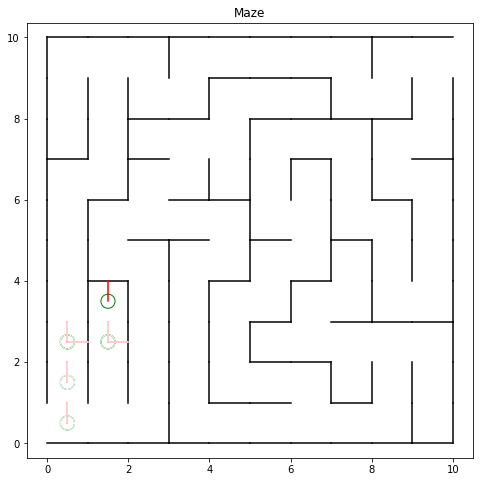

In [12]:
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
ENDX = WIDTH-1
ENDY = HEIGHT-1
posx = 0
posy = 0
direction = UP
# 根据方向画小人
def drawPerson():
    global posx
    global posy
    global direction
    newx = posx+0.5
    newy = posy+0.5
    plt.scatter(newx, newy, color='', marker='o', edgecolors='g', s=200)
    if(direction==UP):
        plt.plot([newx, newx], [newy, newy+0.5], color="red")
    if(direction==RIGHT):
        plt.plot([newx, newx+0.5], [newy, newy], color="red")
    if(direction==DOWN):
        plt.plot([newx, newx], [newy, newy-0.5], color="red")
    if(direction==LEFT):
        plt.plot([newx, newx-0.5], [newy, newy], color="red")
    return

def clearPerson():
    global posx
    global posy
    global direction
    newx = posx+0.5
    newy = posy+0.5
    plt.scatter(newx, newy, color='', marker='o', edgecolors='w', s=200)
    if(direction==UP):
        plt.plot([newx, newx], [newy, newy+0.5], color="white")
    if(direction==RIGHT):
        plt.plot([newx, newx+0.5], [newy, newy], color="white")
    if(direction==DOWN):
        plt.plot([newx, newx], [newy, newy-0.5], color="white")
    if(direction==LEFT):
        plt.plot([newx, newx-0.5], [newy, newy], color="white")
    return

# 是否到达终点
def isEnd():
    global posx
    global posy
    if(posx==ENDX and posy==ENDY):
        return True
    else:
        return False
    
# 前面是否是墙
def isFrontWall():
    global posx
    global posy
    global direction
    x = posx
    y = posy
    if(direction==UP):
        e = (x, y+1, x+1, y+1)
    if(direction==RIGHT):
        e = (x+1, y, x+1, y+1)
    if(direction==DOWN):
        e = (x, y, x+1, y)
    if(direction==LEFT):
        e = (x, y, x, y+1)
    if e in edgeList:
        return True
    else:
        return False

# 左边是否是墙
def isLeftWall():
    global posx
    global posy
    global direction
    x = posx
    y = posy
    if(direction==UP):
        e = (x, y, x, y+1) 
    if(direction==RIGHT):
        e = (x, y+1, x+1, y+1)
    if(direction==DOWN):
        e = (x+1, y, x+1, y+1)
    if(direction==LEFT):
        e = (x, y, x+1, y)
    if e in edgeList:
        return True
    else:
        return False

# 向前走一步
def step():
    global posx
    global posy
    global direction
    clearPerson()
    if(direction==UP):
        posy = min(posy+1, HEIGHT-1)
    if(direction==RIGHT):
        posx = min(posx+1, WIDTH-1)
    if(direction==DOWN):
        posy = max(posy-1, 0)
    if(direction==LEFT):
        posx = max(posx-1, 0)
    drawPerson()
    return 
    
# 向左转
def turnLeft():
    global direction
    clearPerson()
    direction = (direction+3)%4
    drawPerson()
    return 

# 向右转
def turnRight():
    global direction
    clearPerson()
    direction = (direction+1)%4
    drawPerson()
    return 

# 画迷宫
def drawMaze():
    plt.figure(figsize=(8,8))
    plt.axis('equal')
    plt.title('Maze')
    for edge in edgeList:
        drawLine(edge[0], edge[1], edge[2], edge[3])

# 测试代码
drawMaze()
drawPerson()
step()
step()
turnRight()
step()
turnLeft()
step()
plt.show()

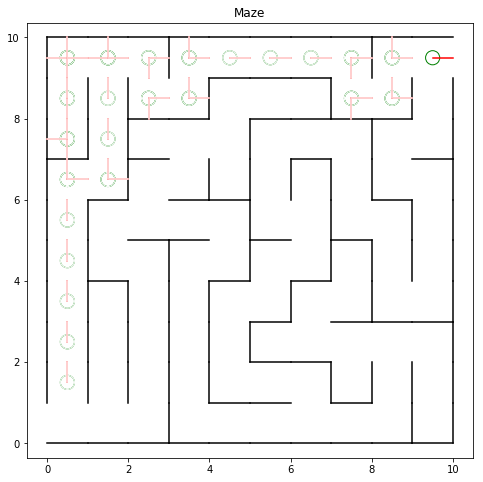

In [13]:
posx = 0
posy = 0
direction = UP

# 沿左侧墙走到终点
def gotoEnd():
    while(not isEnd()):
        if(isLeftWall()):
            if(isFrontWall()):
                turnRight()
            else:
                step()
        else:
            turnLeft()
            step()
    return

drawMaze()
step()
gotoEnd()

练习：沿右侧墙走迷宫（首先画框图，再写判断右侧是否是墙的函数，最后重写gotoEnd函数）

### 广度优先搜索

In [14]:
import numpy as np
Counts = np.ones((HEIGHT, WIDTH))

def initCount(x, y):
    global Counts
    Counts = Counts*(WIDTH*HEIGHT)
    Counts[y][x] = 0

initCount(0, 0)
# print(Counts)

从count为0位置出发，判断上下左右各个位置哪里可以走，在此位置置count值为原始位置count值+1

In [15]:
# 上下左右相邻隔与当前格的边坐标
x0off = [0, 0, 0, 1]
y0off = [1, 0, 0, 0]
x1off = [1, 1, 0, 1]
y1off = [1, 0, 1, 1]
xoff = [0, 0, -1, 1]
yoff = [1, -1, 0, 0]
MAXCOUNT = WIDTH*HEIGHT

def findcount(count):
    l = []
    for j in range(HEIGHT):
        for i in range(WIDTH):
            if Counts[j][i] == count:
                l.append((i,j))
    return l

def setCount():
    for i in range(MAXCOUNT):
        xylist = findcount(i)
        for (x, y) in xylist:
            for k in range(4):
                if (x+x0off[k], y+y0off[k], x+x1off[k], y+y1off[k]) not in edgeList:
                    if y+yoff[k]>=0 and y+yoff[k]<HEIGHT and x+xoff[k]>=0 and x+xoff[k]<WIDTH:
                        if Counts[y+yoff[k]][x+xoff[k]] > i+1:
                            Counts[y+yoff[k]][x+xoff[k]]  = i+1   
    return

Counts = np.ones((HEIGHT, WIDTH))
initCount(ENDX, ENDY)
setCount()
print(Counts[0][0])

22.0


在图中画出到达终点所需的最少步数

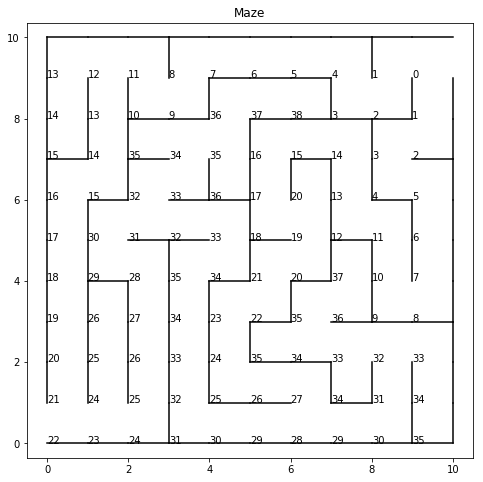

In [16]:
def drawCounts():
    for y in range(HEIGHT):
        for x in range(WIDTH):
            plt.text(x, y, str(int(Counts[y][x])))

drawMaze()
drawCounts()

根据最少步数表格走出迷宫（从起点始终沿着count少1的格子走）

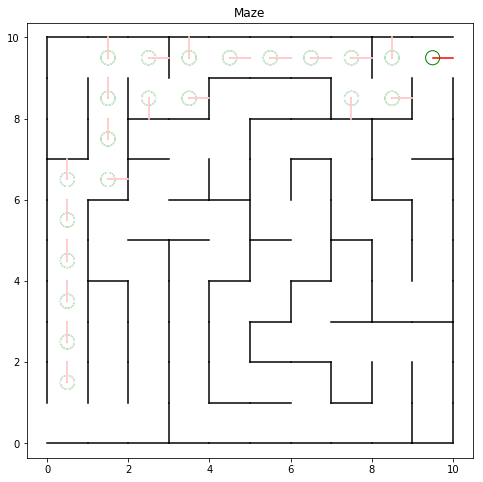

In [17]:
def stepUp():
    global posx
    global posy
    global direction
    clearPerson()
    direction = UP
    posy = min(posy+1, HEIGHT-1)
    drawPerson()

def stepDown():
    global posx
    global posy
    global direction
    clearPerson()
    direction = DOWN
    posy = max(posy-1, 0)
    drawPerson()

def stepRight():
    global posx
    global posy
    global direction
    clearPerson()
    direction = RIGHT
    posx = min(posx+1, WIDTH-1)
    drawPerson()
    
def stepLeft():
    global posx
    global posy
    global direction
    clearPerson()
    direction = LEFT
    posx = max(posx-1, 0)
    drawPerson()
    
posx = 0
posy = 0
def move():
    count = Counts[posy][posx]
    while(count!=0):
        for k in range(4):
            if (posx+x0off[k], posy+y0off[k], posx+x1off[k], posy+y1off[k]) not in edgeList:
                if posy+yoff[k]>=0 and posy+yoff[k]<HEIGHT and posx+xoff[k]>=0 and posx+xoff[k]<WIDTH:
                    if Counts[posy+yoff[k]][posx+xoff[k]] == count-1:
                        break;
        if k==0:
            stepUp()
        if k==1:
            stepDown()
        if k==2:
            stepLeft()
        if k==3:
            stepRight()
        count = Counts[posy][posx]

drawMaze()
move()

改进：

findcount函数可以使用队列来做，不用每次遍历整个Counts表格

## 最短路径

### Dijkstra算法


### 双向搜索（A*算法）